In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps
from scrape import summarize_proj

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.1446016427973253
======= Fold 1 ========
Our accuracy on the validation set is 3.7636622822199217
======= Fold 2 ========
Our accuracy on the validation set is 3.526830918544778
======= Fold 3 ========
Our accuracy on the validation set is 3.6718555228442114
======= Fold 4 ========
Our accuracy on the validation set is 3.983756229265843
Overall accuracy: 3.6181413191344154
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,aj-brown,18.127351,1,6
1,amonra-stbrown,17.455704,2,7
2,ceedee-lamb,17.292152,3,5
3,justin-jefferson,17.195168,4,1
4,davante-adams,17.090935,5,3
5,stefon-diggs,16.698901,6,4
6,jamarr-chase,16.364600,7,11
7,jaylen-waddle,16.192384,8,8
8,tyreek-hill,15.688730,9,2
9,devonta-smith,15.088681,10,9


======= Fold 0 ========
Our accuracy on the validation set is 3.1699369593678957
======= Fold 1 ========
Our accuracy on the validation set is 3.776796157406989
======= Fold 2 ========
Our accuracy on the validation set is 3.4249054795761924
======= Fold 3 ========
Our accuracy on the validation set is 3.8169875878252553
======= Fold 4 ========
Our accuracy on the validation set is 3.985789521079054
Overall accuracy: 3.634883141051077
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,justin-jefferson,17.727874,1,1
1,davante-adams,17.376707,2,3
2,aj-brown,17.264589,3,6
3,jamarr-chase,17.004433,4,11
4,ceedee-lamb,16.972931,5,5
5,stefon-diggs,16.883098,6,4
6,amonra-stbrown,16.176780,7,7
7,tyreek-hill,16.132654,8,2
8,jaylen-waddle,15.767768,9,8
9,cooper-kupp,15.292660,10,23


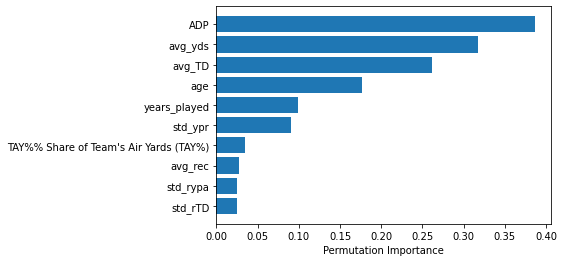

In [3]:
enetPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'enet', pca=False)
enetPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.2214447897385012
======= Fold 1 ========
Our accuracy on the validation set is 3.6715310388843956
======= Fold 2 ========
Our accuracy on the validation set is 3.1201296501745404
======= Fold 3 ========
Our accuracy on the validation set is 3.5065782515007844
======= Fold 4 ========
Our accuracy on the validation set is 4.039876816799649
Overall accuracy: 3.511912109419574
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jamarr-chase,20.0412,1,11
1,cooper-kupp,19.7082,2,23
2,justin-jefferson,19.0138,3,1
3,garrett-wilson,18.9780,4,21
4,tyreek-hill,18.9586,5,2
5,stefon-diggs,18.7108,6,4
6,aj-brown,18.6892,7,6
7,amonra-stbrown,18.1216,8,7
8,davante-adams,17.8412,9,3
9,ceedee-lamb,17.2290,10,5


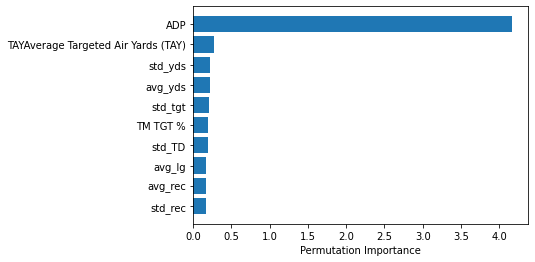

In [4]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [5]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.5774722314244682
======= Fold 1 ========
Our accuracy on the validation set is 3.73694220797621
======= Fold 2 ========
Our accuracy on the validation set is 3.4803607484291077
======= Fold 3 ========
Our accuracy on the validation set is 3.538011505972861
======= Fold 4 ========
Our accuracy on the validation set is 3.9780762400843472
Overall accuracy: 3.662172586777399
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,ceedee-lamb,17.864506,1,5
1,amonra-stbrown,17.828753,2,7
2,aj-brown,17.769147,3,6
3,justin-jefferson,17.380669,4,1
4,davante-adams,17.103409,5,3
5,tyreek-hill,16.357264,6,2
6,stefon-diggs,16.304908,7,4
7,jamarr-chase,16.005278,8,11
8,jaylen-waddle,15.446656,9,8
9,dj-moore-wr,15.411418,10,24


In [6]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022, scoring='HALF')
xgbHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', scoring='HALF')
xgbHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.8468544985531232
======= Fold 1 ========
Our accuracy on the validation set is 3.0114931285686146
======= Fold 2 ========
Our accuracy on the validation set is 2.6599327292256394
======= Fold 3 ========
Our accuracy on the validation set is 3.0884673934498483
======= Fold 4 ========
Our accuracy on the validation set is 2.8820399436288606
Overall accuracy: 2.8977575386852172
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,ceedee-lamb,14.899600,1,6
1,amonra-stbrown,14.502509,2,8
2,aj-brown,14.341370,3,5
3,jamarr-chase,14.154404,4,12
4,stefon-diggs,14.097832,5,4
5,davante-adams,13.899268,6,2
6,jaylen-waddle,13.788397,7,7
7,justin-jefferson,13.669727,8,1
8,devonta-smith,13.227879,9,10
9,tyreek-hill,12.807681,10,3


======= Fold 0 ========
Our accuracy on the validation set is 2.9256956235900335
======= Fold 1 ========
Our accuracy on the validation set is 3.046603198739951
======= Fold 2 ========
Our accuracy on the validation set is 2.6851335695210685
======= Fold 3 ========
Our accuracy on the validation set is 3.070079207413578
======= Fold 4 ========
Our accuracy on the validation set is 2.9424929536323563
Overall accuracy: 2.9340009105793974
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,justin-jefferson,13.958499,1,1
1,davante-adams,13.768119,2,2
2,jamarr-chase,13.746082,3,12
3,stefon-diggs,13.643829,4,4
4,cooper-kupp,13.586913,5,24
5,tyreek-hill,13.559252,6,3
6,aj-brown,13.521695,7,5
7,ceedee-lamb,13.454595,8,6
8,jaylen-waddle,13.053016,9,7
9,amonra-stbrown,12.957995,10,8


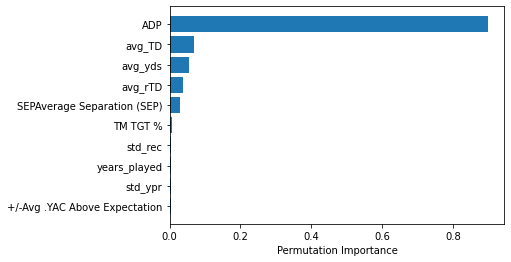

In [7]:
enetHALF_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'enet', pca=False, scoring='HALF')
enetHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.6885399848244775
======= Fold 1 ========
Our accuracy on the validation set is 2.877298417968932
======= Fold 2 ========
Our accuracy on the validation set is 3.086289278669112
======= Fold 3 ========
Our accuracy on the validation set is 2.8621558958402344
======= Fold 4 ========
Our accuracy on the validation set is 2.948648610449706
Overall accuracy: 2.8925864375504924
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,cooper-kupp,17.9480,1,24
1,amonra-stbrown,17.4352,2,8
2,jamarr-chase,17.2548,3,12
3,deebo-samuel,16.8304,4,38
4,tyreek-hill,16.2724,5,3
5,justin-jefferson,15.9962,6,1
6,ceedee-lamb,15.8240,7,6
7,aj-brown,15.5798,8,5
8,stefon-diggs,15.4538,9,4
9,chris-godwin,15.3750,10,20


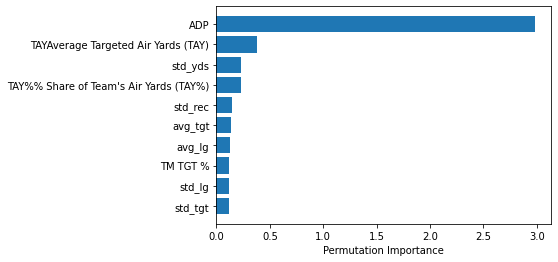

In [8]:
rfHALF_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False, scoring='HALF')
rfHALF_results.head(50)

In [9]:
svrHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', model_='svr', scoring='HALF')
svrHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.853742480514973
======= Fold 1 ========
Our accuracy on the validation set is 3.215077161888856
======= Fold 2 ========
Our accuracy on the validation set is 2.6651076411753576
======= Fold 3 ========
Our accuracy on the validation set is 3.0878854226276977
======= Fold 4 ========
Our accuracy on the validation set is 2.8872274139243905
Overall accuracy: 2.941808024026255
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,ceedee-lamb,15.305470,1,6
1,amonra-stbrown,15.278406,2,8
2,justin-jefferson,14.549398,3,1
3,aj-brown,14.071213,4,5
4,jamarr-chase,14.048950,5,12
5,stefon-diggs,13.816736,6,4
6,devonta-smith,13.546313,7,10
7,davante-adams,13.390850,8,2
8,tyreek-hill,13.379322,9,3
9,michael-pittman,13.211538,10,23


In [10]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results, enetPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/wr_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,aj-brown,17.962572,1
1,justin-jefferson,17.829378,2
2,amonra-stbrown,17.395709,3
3,jamarr-chase,17.353878,4
4,davante-adams,17.353063,5
5,ceedee-lamb,17.339647,6
6,stefon-diggs,17.149427,7
7,tyreek-hill,16.784312,8
8,jaylen-waddle,15.971452,9
9,cooper-kupp,15.955194,10


In [11]:
summarize_proj('wr', '2022', 'PPR')

,name,rf proj,xgb proj,enet proj,svr proj,mean proj,rank,last rank
6,aj-brown,18.6892,18.127351,17.264589,17.769147,17.962572,1,6
2,justin-jefferson,19.0138,17.195168,17.727874,17.380669,17.829378,2,1
7,amonra-stbrown,18.1216,17.455704,16.176780,17.828753,17.395709,3,7
0,jamarr-chase,20.0412,16.364600,17.004433,16.005278,17.353878,4,11
8,davante-adams,17.8412,17.090935,17.376707,17.103409,17.353063,5,3
...,...,...,...,...,...,...,...,...
78,nelson-agholor,5.8458,6.380900,7.105385,5.765382,6.274367,85,88
80,randall-cobb,5.3752,5.977358,7.047785,5.151074,5.887854,86,86
77,kalif-raymond,5.9744,4.820386,6.375809,5.898942,5.767384,87,57
74,trent-sherfield,6.3120,4.965234,5.740732,5.480830,5.624699,88,82


In [12]:
mean_results_HALF = xgbHALF_results.append([rfHALF_results, svrHALF_results, enetPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_HALF = mean_results_HALF.reset_index(drop=True)
mean_results_HALF['rank'] = mean_results_HALF.index + 1
mean_results_HALF.to_csv('projections/wr_HALF_2022_mean_projections.csv', index = False)
mean_results_HALF.head(50)

,name,proj fpts,rank
0,amonra-stbrown,15.848224,1
1,ceedee-lamb,15.750500,2
2,jamarr-chase,15.615647,3
3,justin-jefferson,15.485800,4
4,aj-brown,15.314243,5
5,stefon-diggs,15.062866,6
6,tyreek-hill,14.648014,7
7,davante-adams,14.364206,8
8,cooper-kupp,14.244537,9
9,jaylen-waddle,13.804090,10


In [13]:
summarize_proj('wr', '2022', 'HALF')

,name,rf proj,xgb proj,enet proj,svr proj,mean proj,rank,last rank
1,amonra-stbrown,17.4352,14.502509,12.957995,15.278406,15.848224,1,8
6,ceedee-lamb,15.8240,14.899600,13.454595,15.305470,15.750500,2,6
2,jamarr-chase,17.2548,14.154404,13.746082,14.048950,15.615647,3,12
5,justin-jefferson,15.9962,13.669727,13.958499,14.549398,15.485800,4,1
7,aj-brown,15.5798,14.341370,13.521695,14.071213,15.314243,5,5
...,...,...,...,...,...,...,...,...
72,nick-westbrook,7.1196,3.872876,4.663944,4.886423,5.646479,84,72
79,nelson-agholor,6.7396,3.955799,4.792303,4.474496,5.568820,86,81
55,quez-watkins,7.9182,2.968628,4.129448,4.410596,5.463884,87,77
80,randall-cobb,6.6314,2.692348,3.461980,2.977016,4.837137,88,79
